<a href="https://colab.research.google.com/github/CalebAnderson22/PHY122/blob/main/N3L_Anderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 3

Caleb Anderson

09 November 2024

#  <font color='Red'> **Import Necessary Modules** </font>

In [1174]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, array, zeros
from numpy.linalg import norm
from mpl_toolkits import mplot3d
import textwrap

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π =  np.pi

###  <font color='Green'> Necessary Defintions. </font>

In [1175]:
###
def rotation_xy(θ):
    """
    GIVEN: θ (in degrees)
    GET: rotation matrix
    """
    θ *= np.pi/180
    return np.array([ [np.cos(θ), -np.sin(θ), 0.], [np.sin(θ), np.cos(θ), 0.], [0., 0., 1.]])

def projection(basis, f_in):
    f_1 = np.dot( basis[0], f_in ) * basis[0]
    f_2 = np.dot( basis[1], f_in ) * basis[1]
    f_3 = np.dot( basis[2], f_in ) * basis[2]
    return [f_1, f_2, f_3]

def Ramp(θ, μS, μK, f_in):

    basis = (rotation_xy(θ) @ np.eye(3)).T

    f_fric, f_normal, f_z = projection(basis, -f_in)

    if np.linalg.norm(f_fric) <= np.linalg.norm( μS * f_normal ):
        None
    if np.linalg.norm(f_fric) > np.linalg.norm( μS * f_normal ):
        f_fric = np.linalg.norm(μK * f_normal) * f_fric / np.linalg.norm(f_fric)

    return f_normal + f_fric + f_z

#  <font color='Red'> **Experiment 1: Familiarization with Definitions.** </font>

###  <font color='Red'> The Rotation Matrix, print the rotation matrix for 3 angles of your choosing (note the defintion requires the angle in degrees). </font>

In [1176]:
print( rotation_xy(30) )
print( rotation_xy(45) )
print( rotation_xy(60) )

[[ 0.866 -0.5    0.   ]
 [ 0.5    0.866  0.   ]
 [ 0.     0.     1.   ]]
[[ 0.7071 -0.7071  0.    ]
 [ 0.7071  0.7071  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.5   -0.866  0.   ]
 [ 0.866  0.5    0.   ]
 [ 0.     0.     1.   ]]


###  <font color='Red'> Choose a rotation matrix from above, to rotate the usual Cartesian Basis (i.e. (Rotation_Matrix @ np.eye(3)).T ) and print the result. </font>

In [1177]:
basis = (rotation_xy(45) @ np.eye(3)).T
print( basis )

[[ 0.7071  0.7071  0.    ]
 [-0.7071  0.7071  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Define an arbitrary acting force vector (3 component vector). </font>

In [1178]:
f_in  = array([0., -100, 0.])
print(f_in)

[   0. -100.    0.]


###  <font color='Red'> Use Newton's 3rd Law to get a Reacting force (tentative. </font>

In [1179]:
f_react = -f_in
print(f_react)

[ -0. 100.  -0.]


###  <font color='Red'> Project an arbitrary force vector, i.e. decompose into 3 vectors, e.g. f_in, on the new basis defined above. </font>

In [1180]:
f_fric, f_normal, f_z = projection(basis, f_react)

###  <font color='Red'> Filter the frictional-projection. 1st, define the static friction coefficient (μS) and then the kinetic friction coefficient (μK). 2nd, define two if-statements to determine if friction component of the force above should be the static XOR kinetic one. </font>

In [1181]:
μS = 0.5
μK = 0.25

if norm(f_fric) <= norm( μS * f_normal ): ## f_2
    None
if norm(f_fric) > norm( μS * f_normal ):
    f_2 = norm(μK * f_normal) * f_fric

###  <font color='Red'> Now determine the total force: f_in = -f_out $\rightarrow$ f_in + f_out = f_net. e.g. in the static limit f_net = 0. Print this net force. </font>

In [1182]:
net_force = f_fric + f_normal + f_z + f_in

print("Net Force is %4.3f N" %(norm(net_force) ) )

Net Force is 0.000 N


###  <font color='Red'> Now use: Ramp(θ, μS, μK, f_in), to get the reactive force (f_out), with your choice of angle (θ), static friction coefficient (μS), kinetic friction coefficient (μK), and the f_in you defined above.

### Add this to f_in, do the results match from above? </font>

In [1183]:
print("Net Force is %4.3f N" %( norm( Ramp(30, 0.5, 0.25, f_in) + f_in ) ) )

Net Force is 28.349 N


#  <font color='Red'> **Experiment 2: Varying Angle.** </font>

###  <font color='Red'> Define the range of angles you wish to test (using arange). </font>

In [1184]:
θs = arange(0,90,0.1) ## range of angles you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the angle array defined above. Fix the value of the static friction, set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [1185]:
f  = zeros(len(θs)) ## create an empty array to fill-in later of length θs
for i in range(len(θs)): ## for-loop over all configurations, e.g. array θs
    f[i] = norm( Ramp(θs[i], 0.5, 0.0, f_in) + f_in ) ## compute the net-force given the i-th θs configuration

print(f[265])
print(f[266])

1.5888218580782548e-14
44.77590878387698


###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

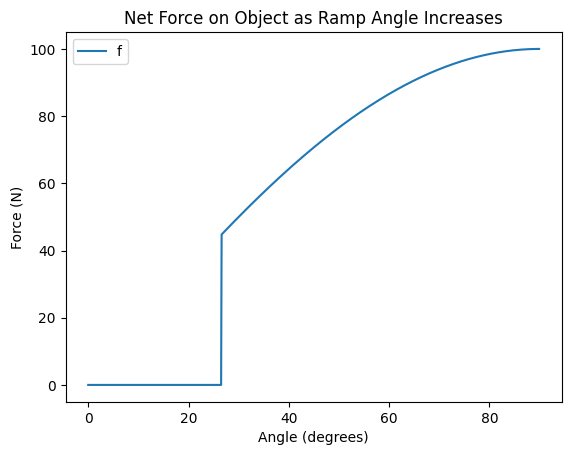

In [1186]:
plt.plot(θs, f, label="f")
plt.xlabel("Angle (degrees)")
plt.ylabel("Force (N)")
plt.legend(loc="upper left")
plt.title("Net Force on Object as Ramp Angle Increases")
plt.show()

Our ramp starts at 0°, where the Normal force from the ramp is completely equal and opposite to the 100 N of Weight on the object, making the Net Force 0 N. As the inclination of the ramp increases, the component of Weight parallel to the surface of the ramp becomes non-zero, and Static Friction begins working equal and opposite to this component. The Normal force continues opposing equally the component of Weight perpendicular to the surface of the ramp. Static Friction increases commensurate with the component of Weight parallel to the ramp's surface (keeping Net Force 0 N) until approximately 26.6° above the horizontal, when Static Friction is overcome and the object begins to slide. That the object is sliding means the force of Friction is now proportional in magnitude to the Normal force by the Coefficient of Kinetic Friction, which is smaller than the Coefficient of Static Friction was. This means the force of Friction opposing the component of Weight parallel to the ramp's surface is much weaker than it was previously, and Net Force instantaneously becomes non-zero. The direction of the Net Force is opposite that of Friction ("down" the ramp). As the inclination of the ramp increases more and more, less and less of the Weight of the object acts perpendendicular to the surface of the ramp, in turn reducing the Normal force opposing it. The simultaneous decrease in Weight perpendicular to the ramp and Normal force opposing it increases the Weight acting parallel to the surface of the ramp and decreases the Kinetic Friction opposing it, respectively. The margin between these two forces thus itself grows, but trigonometrically. As the net force perpendicular to the surface of the ramp stays zero, the increase in global Net Force is thus equivalent to the margin parallel to the surface of the ramp, so it increases trigonometrically as well. This process continues until the inclination of the ramp becomes 90° above the horizontal, and all 100 N of Weight acts parallel to the surface of the ramp, requiring 0 N of Normal force to oppose it perpendicularly, in turn meaning there is 0 N of Kinetic Friction to oppose it in parallel. Thus, Net Force arrives at its maximum, with all 100 N of Weight the only force acting on the object.

#  <font color='Red'> **Experiment 3: Varying Static Friction Coefficient.** </font>

###  <font color='Red'> Define the range of static-friction-coefficients you wish to test (using arange). </font>

In [1187]:
μs = arange(0,10,0.1) ## range of static friction coefficients you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the static-friction-coefficient array defined above. Fix the value of the angle, and set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [1188]:
f  = zeros(len(μs)) ## create an empty array to fill-in later of length μs
for i in range(len(μs)): ## for-loop over all configurations, e.g. array μs
    f[i] = norm( Ramp(45, μs[i], 0.0, f_in) + f_in ) ## compute the net-force given the i-th μs configuration

print(f[9])
print(f[10])

70.71067811865474
7.105427357601002e-15


###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

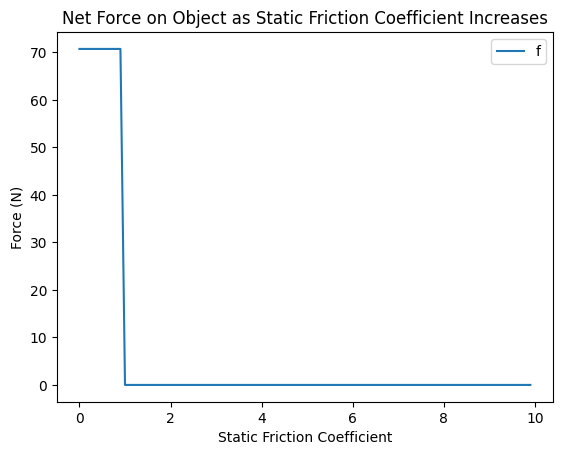

In [1189]:
plt.plot(μs, f, label="f")
plt.xlabel("Static Friction Coefficient")
plt.ylabel("Force (N)")
plt.legend(loc="upper right")
plt.title("Net Force on Object as Static Friction Coefficient Increases")
plt.show()

We start again with a Weight of 100 N acting on our object, but fix the angle of the ramp at 45° above the horizontal. We vary the Coefficient of Static Friction of the surface of the ramp from 0 to 10, however. When the Coefficient is 0, we can easily imagine (and see) that Net Force on the object is at its maximum of approximately 70.7 N (the component of Weight perpendicular to the surface of the ramp is still being equally opposed by the Normal force). However, physically this is a little misleading. A too-weak static friction (and with a Coefficient of 0, Static Friction is as weak as it can get) would ordinarily shift us into Kinetic Friction, but here we have arbitrarily defined the Coefficient of Kinetic Friction to be 0 invariantly. This enables the graph to precisely reflect when the Coefficient of Static Friction becomes large enough such that Static Friction can oppose the component of Weight parallel to the surface of the ramp. This occurs at a coefficient approximately equal to 1, meaning that at an angle of 45° above the horizontal, so long as Static Friction is greater than or equal to the Normal force, Net Force on our object will be zero.

#  <font color='Red'> **Experiment 4: Kinetic Friction and Dynamics.** </font>

###  <font color='Red'> Lets consider kinematics as discussed before, using the familiar Velocity-Verlet algorithm. </font>

###  <font color='Red'> Define the following 9 variables (similar to lab 2):
*   Time Resolution (dt)
*   Time-array
*   Mass of your particle
*   Initial Position (x0)
*   Initial Velocity set to zeros (v0 = np.zeros(3))
*   Initial Acceleration set to zeros (v0 = np.zeros(3))
*   Angle (θ)
*   Static Friction Coefficient (μs)
*   Static Friction Coefficient (μk)
 </font>

In [1190]:
θ  = 60   ## initial angle
μs = 0.6 ## static-friction coefficient
μk = 0.3  ## kinetic-friction coefficient

dt = 0.1 ## s  : detector/sim time resolution
mass = 5 ## kg : mass of particle
g = 10   ## m/s/s
x0 = array([0.,  0. , 0.]) ## m  : initial position
v0 = array([ 0.,  0. , 0.]) ## m/s: initial velocity
a0 = array([ 0., 0., 0.]) * mass * g ## m/s/s: initial acceleration

time = arange(0, 10, dt) ## s : time array (array containing all moments in time)

###  <font color='Red'> Define an acting force on this particle acting for all times, e.g. the force of gravity (it can be any force), i.e. f_t a 2D array, the same shape of the force defined in lab 2.  </font>

In [1191]:
f_t_act = zeros((len(time), 3 )) ## empty force-trajectory array
f_t_act[:,1] = -1. * mass * g  ## fill-in all 1-axis ('y'-axis) entries to -mg.

###  <font color='Red'> Define your Velocity Verlet, but with the new Force acting-reacting force term! To get the trajectory (for position, velocity, and acceleration)  </font>

In [1192]:
x_t = zeros((len(time), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v_t = zeros((len(time), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(time), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = (Ramp(θ, μs, μk, f_t_act[0]) + f_t_act[0] )/mass

for t in range(1,len(time)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
    x_t[t] = x_t[t-1] + v_t[t-1] * dt + a_t[t-1] * dt*dt/2 ## Velocity-Verlet Step 1 : find new position from old data
    a_t[t] = (Ramp(θ, μs, μk, f_t_act[t]) + f_t_act[t] )/mass ## compute new acceleration from the net-force
    v_t[t] = v_t[t-1] + (a_t[t-1] + a_t[t]) * dt/2 ## compute new velocity

print(a_t[1])
print(x_t[99])

[-3.5801 -6.201   0.    ]
[-175.4441 -303.8781    0.    ]


###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

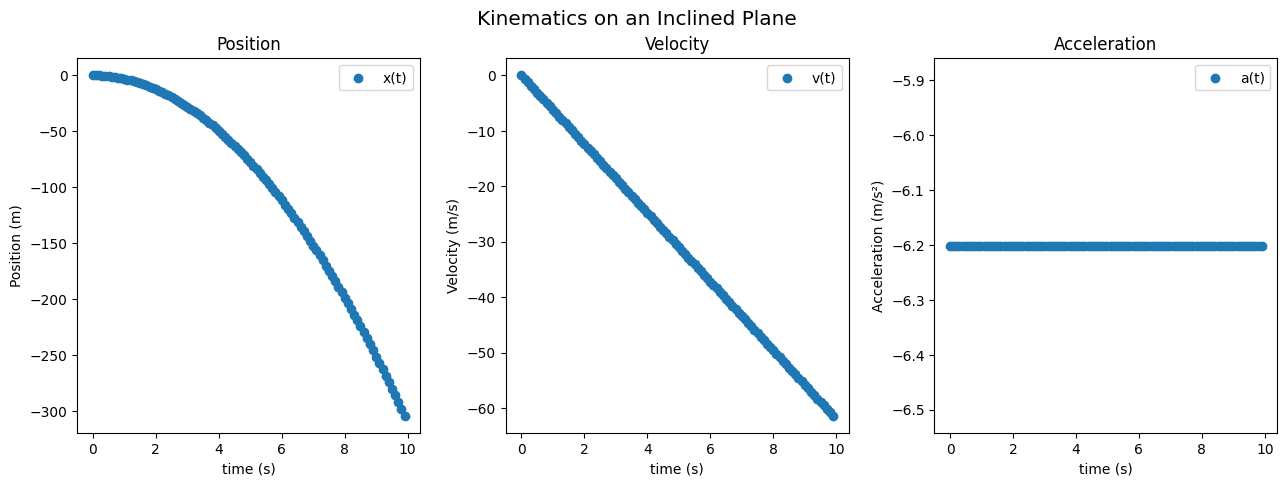

In [1193]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.text(1, 1, "Kinematics on an Inclined Plane", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.15)

ax1.scatter(time, x_t[:,1], label="x(t)")
ax1.legend(loc="upper right")
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(time, v_t[:,1], label="v(t)")
ax2.legend(loc="upper right")
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(time, a_t[:,1], label="a(t)")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s\u00b2)')

fig.show()

For this experiment, we place an object of mass 5 kg at rest (velocity = 0 m/s) at x = 0 m on an infinite plane inclined 60° above the horizontal. Acceleration due to gravity is -10 m/s/s aligned vertically. The Coefficient of Static Friction and of Kinetic Friction for the ramp is 0.6 and 0.3, respectively. The component of the object's Weight parallel to the surface of the ramp immediately overtakes Static Friction, and as the inclination of the ramp remains the same, the magnitude of Kinetic Friction is constant as well. This means the Net Force is constant, leading to a constant acceleration of approximately -6.2 m/s/s parallel to the surface of the plane. The constant negative acceleration implies a linearly decreasing velocity, which, given its starting value of 0 m/s, means it is only ever and only ever gets more negative. The linearly decreasing velocity means that position exponentially decreases, ending up at approximately x = -303.9 m after 10 seconds.

#  <font color='Red'> **Conclusion:** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demonstrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>


###  <font color='Red'> If your surface is completely parallel to the gravity-vector $\mathbf{g}$ (i.e. angle is 90 degrees from horizontal surface), can static friction support the object on this surface? </font>

No. If the surface is 90° above the horizontal, there is no component of Weight that acts perpendicular to the surface, meaning there is no Normal force opposing it. The magnitude of Static Friction is proportional to the Normal force by the Coefficient of Static Friction, so if the magnitude of the Normal force is 0 N, the value of the Coefficient is irrelevant, as no matter its value Static Friction will also be 0 N. Thus, Static Friction does not act to support the object on the surface at all.

###  <font color='Red'> Is there an angle, such that no motion occurs with a static friction coefficient of 0.0? </font>

Yes. Assuming an object initially at rest, if it resides on a surface inclined at 0°, the only two forces acting on it are Weight and the Normal force, which oppose each other equally. The Net Force in this situation is 0 N precisely because there is no component of Weight parallel to the surface, so the 0 N of Static Friction available to oppose it due to the Coefficient of 0 is irrelevant. With a Net Force of 0 N, acceleration is also 0 m/s/s, leaving the object motionless with its intial velocity of 0 m/s.